<a href="https://colab.research.google.com/github/IvanWasNotAvailable/IvanWasNotAvailable/blob/main/StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
%pip install yfinance
import yfinance as yf

from datetime import datetime, timedelta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
comp = 'BAS.DE'

In [3]:
ticker = yf.Ticker(comp).info
print(ticker.keys())

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'for

In [5]:
ticker = yf.Ticker(comp).info
longName = ticker['longName']
fullTimeEmployees = ticker['fullTimeEmployees']
totalCash = ticker['totalCash']
phone = ticker['phone']
print('Company:', longName)
print('FTEs', fullTimeEmployees)
print('TotalCash', totalCash/1000000 , 'M')
print('Tel:', phone)

Company: BASF SE
FTEs 111768
TotalCash 3384.999936 M
Tel: 49 0621 60 0


In [7]:
%pip install yahoofinancials
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import pandas as pd
yahoo_financials = YahooFinancials(comp)
data = yahoo_financials.get_historical_price_data(start_date='2021-01-04', end_date='2022-12-31', time_interval='weekly')
basf_df = pd.DataFrame(data[comp]['prices'])
basf_df = basf_df.drop(['low', 'high', 'adjclose', 'close', 'volume', 'date'], axis=1)
basf_df.head(20)

,open,formatted_date
0,65.480003,2021-01-03
1,67.510002,2021-01-10
2,66.500000,2021-01-17
3,66.669998,2021-01-24
4,64.559998,2021-01-31
5,67.129997,2021-02-07
6,67.239998,2021-02-14
7,67.889999,2021-02-21
8,68.500000,2021-02-28
9,71.110001,2021-03-07


In [91]:
#add increased variable, wich shows if the open price is higher then last week
basf_df['increased'] = basf_df.open >= basf_df.open.shift()
print(basf_df)

          open formatted_date  increased
0    65.480003     2021-01-03      False
1    67.510002     2021-01-10       True
2    66.500000     2021-01-17      False
3    66.669998     2021-01-24       True
4    64.559998     2021-01-31      False
..         ...            ...        ...
96   46.509998     2022-11-06       True
97   50.730000     2022-11-13       True
98   49.500000     2022-11-20      False
99   49.334999     2022-11-27      False
100  47.799999     2022-12-02      False

[101 rows x 3 columns]


In [92]:
#change to binary -> True = 1 & False = 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
basf_df['increased'] = encoder.fit_transform(basf_df['increased'])

In [93]:
basf_df.head()

,open,formatted_date,increased
0,65.480003,2021-01-03,0
1,67.510002,2021-01-10,1
2,66.500000,2021-01-17,0
3,66.669998,2021-01-24,1
4,64.559998,2021-01-31,0


In [94]:
#check the date format
x = basf_df.formatted_date[1]
print(x)

2021-01-10


[*********************100%***********************]  1 of 1 completed
Week: 2021-01-03  -  2021-01-10
Increased:  1 Index: 0


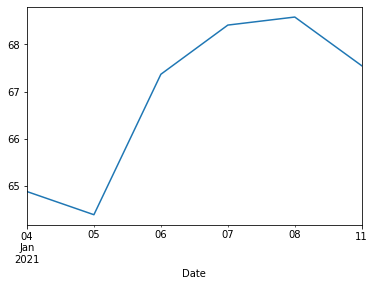

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-10  -  2021-01-17
Increased:  0 Index: 1


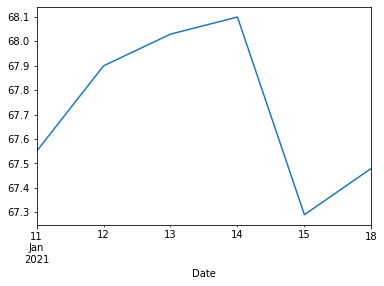

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-17  -  2021-01-24
Increased:  1 Index: 2


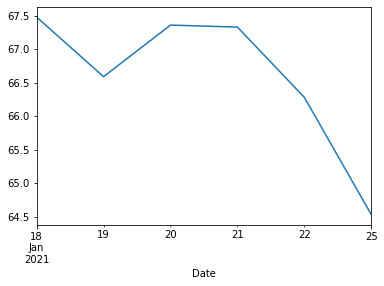

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-24  -  2021-01-31
Increased:  0 Index: 3


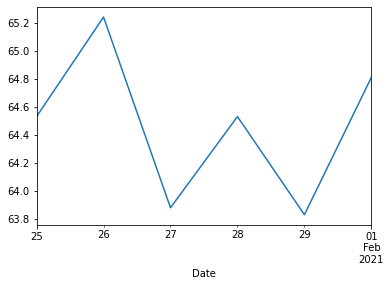

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-31  -  2021-02-07
Increased:  1 Index: 4


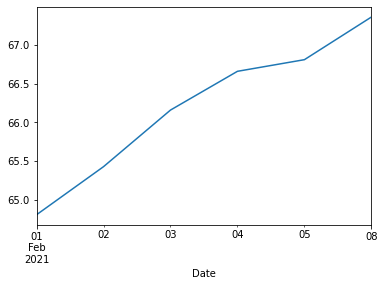

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-07  -  2021-02-14
Increased:  1 Index: 5


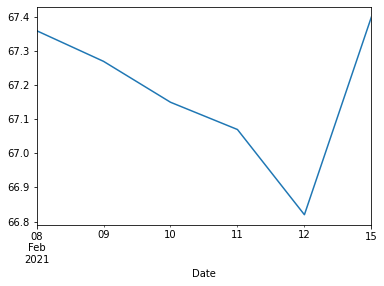

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-14  -  2021-02-21
Increased:  1 Index: 6


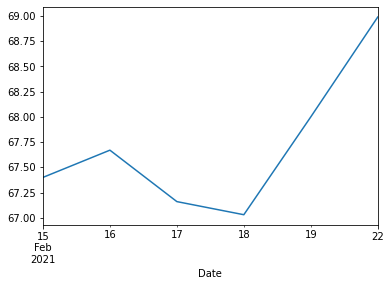

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-21  -  2021-02-28
Increased:  1 Index: 7


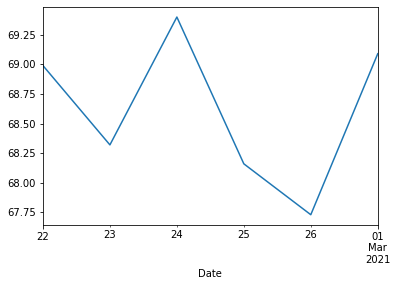

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-28  -  2021-03-07
Increased:  1 Index: 8


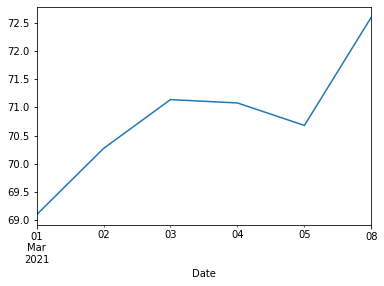

[*********************100%***********************]  1 of 1 completed
Week: 2021-03-07  -  2021-03-14
Increased:  1 Index: 9


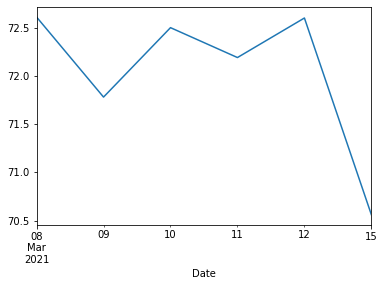

[*********************100%***********************]  1 of 1 completed
Week: 2021-03-14  -  2021-03-21
Increased:  0 Index: 10


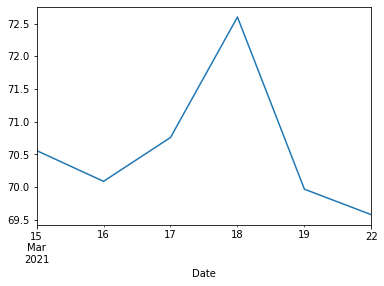

In [95]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

#print the first 10 weekly charts 
for index, row in basf_df.iterrows():
    #set start and end of the week & get data
    start = basf_df.formatted_date[index]
    startDate = datetime.strptime(basf_df.formatted_date[index], "%Y-%m-%d") + timedelta(days=0)
    end = basf_df.formatted_date[index+1]
    endDate = datetime.strptime(basf_df.formatted_date[index+1], "%Y-%m-%d") + timedelta(days=2)

    data = yf.download(comp,startDate,endDate)
    # Plot the close chart
    print('Week:', start, ' - ',end)
    print('Increased: ', basf_df.increased[index+1], 'Index:', index)
    data['Close'].plot()
    plt.show()
    #stop after printing 10 charts
    if index == 10:
      break

In [98]:
#we can now drop the open price
basf_df = basf_df.drop(['open'], axis=1)

KeyError: ignored

In [ ]:
basf_df.head(10)

In [ ]:
#if wanted we could add relative price difference -> -1 to 1 -> 0.3 = 30% increase 